# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import requests
import time

# OpenWeatherMap API Key (replace with your actual API key)
api_key = "25f20e6aaa2fca6434e3727ceaf4c8d9"

# Base URLs
geocode_url = "http://api.openweathermap.org/geo/1.0/direct"
weather_url = "https://api.openweathermap.org/data/3.0/onecall"

# List of countries to pull cities from
countries = [
    "US", "GB", "IN", "CA", "AU", "FR", "DE", "CN", "RU", "BR", "MX", "ZA", "JP", "NG", "EG", "AR",
    "ID", "TR", "SA", "PK", "KR", "IT", "ES", "PL", "NL", "TH", "MY", "PH", "CO", "VE", "CL", "UA",
    "PE", "IR", "VN", "SE", "RO", "KE", "DZ", "KZ", "IQ", "AT", "HU", "CH", "BE", "GR", "PT", "NO"
]

# Store city and weather data
city_data = []
processed_cities = set()  # To avoid duplicates

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Step 1: Fetch at least 591 cities dynamically
for country in countries:
    if len(processed_cities) >= 591:
        break  # Stop when we reach 591+ unique cities

    try:
        # Get major cities from the country using Geocoding API
        geocode_params = {"q": country, "appid": api_key, "limit": 10}
        response = requests.get(geocode_url, params=geocode_params)
        response.raise_for_status()
        city_info_list = response.json()

        for city_info in city_info_list:
            city_name = city_info["name"]
            city_lat = city_info["lat"]
            city_lng = city_info["lon"]
            city_country = city_info["country"]

            # Avoid duplicates
            if city_name in processed_cities:
                continue

            processed_cities.add(city_name)

            # Step 2: Fetch weather data
            weather_params = {
                "lat": city_lat,
                "lon": city_lng,
                "exclude": "minutely,hourly,alerts",
                "appid": api_key,
                "units": "metric"
            }

            print(f"Processing {len(processed_cities)}/591: {city_name}, {city_country}")

            weather_response = requests.get(weather_url, params=weather_params)
            weather_response.raise_for_status()
            weather_data = weather_response.json()

            # Step 3: Extract required values
            city_max_temp = weather_data["current"]["temp"]
            city_humidity = weather_data["current"]["humidity"]
            city_clouds = weather_data["current"]["clouds"]
            city_wind = weather_data["current"]["wind_speed"]
            city_date = weather_data["current"]["dt"]

            # Store data
            city_data.append({
                "City": city_name,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })

            # Stop when we reach 591+ cities
            if len(processed_cities) >= 591:
                break

            # Pause to avoid rate limits
            time.sleep(1)

    except Exception as e:
        print(f"Error retrieving cities from {country}. Skipping... ({e})")

# Step 4: Save to DataFrame & CSV
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv("weather_data.csv", index=False)

# Completion message
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing 1/591: Us, FR
Processing 2/591: Uz, FR
Processing 3/591: City of Osh, KG
Processing 4/591: Юськи, RU
Processing 5/591: Geva, IL
Processing 6/591: Politische Expositur Gröbming, AT
Processing 7/591: Innermedøya, NO
Processing 8/591: Ip, RO
Processing 9/591: Indre Marka, NO
Processing 10/591: Indre Borgfjord, NO
Processing 11/591: Indre Ånnstad, NO
Processing 12/591: Companhia, BR
Processing 13/591: Ca', IT
Processing 14/591: California, AE
Processing 15/591: Lauw, FR
Processing 16/591: Au, DE
Processing 17/591: Gemeinde Au, AT
Processing 18/591: Postau, DE
Processing 19/591: Schönberg/Schoenberg, CH
Processing 20/591: Fr, UG
Processing 21/591: فر, IR
Processing 22/591: Far, SA
Processing 23/591: Daix, FR
Processing 24/591: Deh, ML
Processing 25/591: De, ID
Processing 26/591: Alvaneu Dorf, CH
Processing 27/591: Chun, TH
Processing 28/591: Chanthaburi, TH
Processing 29/591: Rovello Porro, IT
Processing 30/591: Комарово, RU


In [17]:

# Show Record Count
city_data_df.count()

City          159
Lat           159
Lng           159
Max Temp      159
Humidity      159
Cloudiness    159
Wind Speed    159
Country       159
Date          159
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Us,49.100945,1.967247,-0.84,100,34,1.03,FR,1741056538
1,Uz,42.966369,-0.085232,4.81,85,97,3.23,FR,1741056539
2,City of Osh,40.536190,72.803362,-5.55,68,16,3.00,KG,1741056540
3,Юськи,56.660308,53.080233,-6.80,96,100,3.77,RU,1741056541
4,Geva,32.566336,35.371549,12.80,56,100,1.94,IL,1741056543


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Us,49.100945,1.967247,-0.84,100,34,1.03,FR,1741056538
1,Uz,42.966369,-0.085232,4.81,85,97,3.23,FR,1741056539
2,City of Osh,40.536190,72.803362,-5.55,68,16,3.00,KG,1741056540
3,Юськи,56.660308,53.080233,-6.80,96,100,3.77,RU,1741056541
4,Geva,32.566336,35.371549,12.80,56,100,1.94,IL,1741056543


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

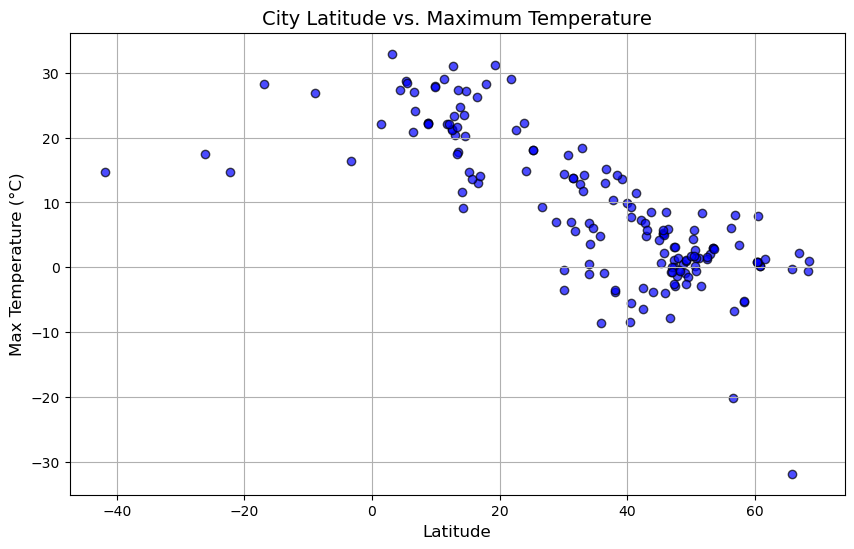

In [8]:
# Load the weather data (Ensure you have "weather_data.csv")
weather_df = pd.read_csv("weather_data.csv")

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], c="blue", edgecolors="black", alpha=0.7)

# Incorporate other graph properties
plt.title("City Latitude vs. Maximum Temperature", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

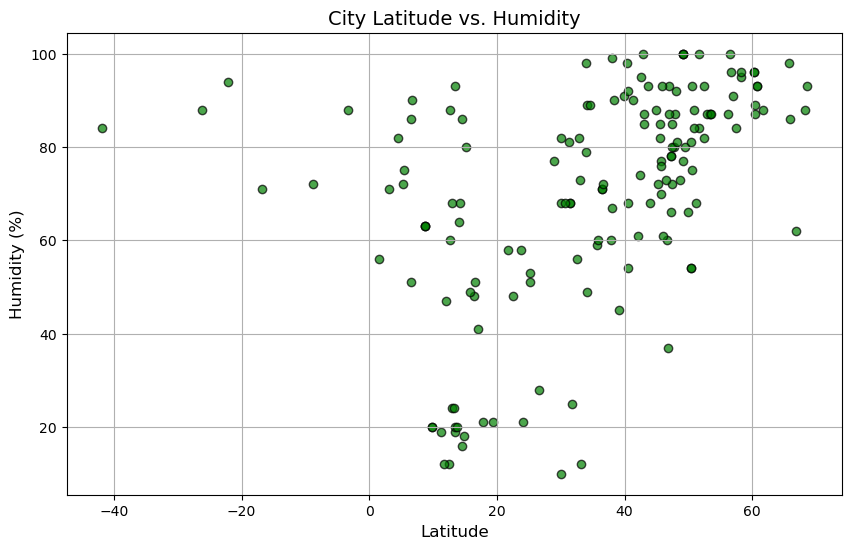

In [9]:
# Build scatter plot for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(weather_df["Lat"], weather_df["Humidity"], c="green", edgecolors="black", alpha=0.7)

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

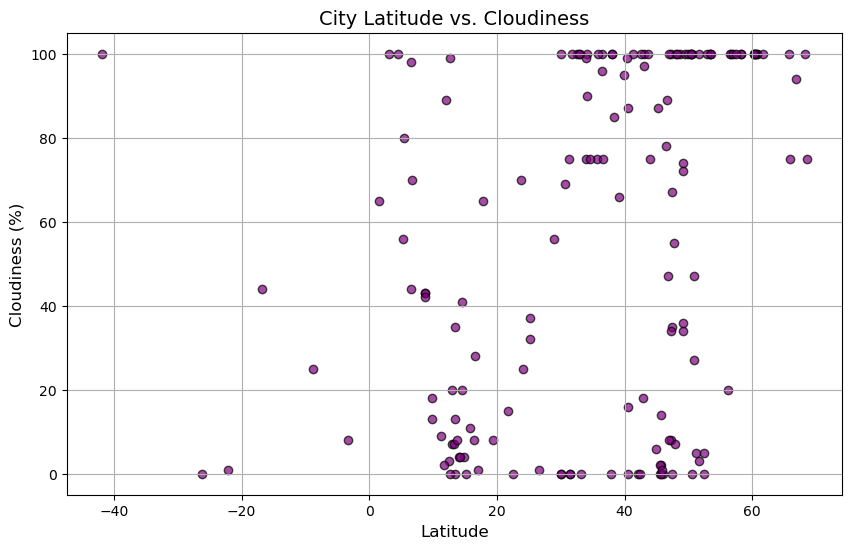

In [10]:
# Build scatter plot for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], c="purple", edgecolors="black", alpha=0.7)

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

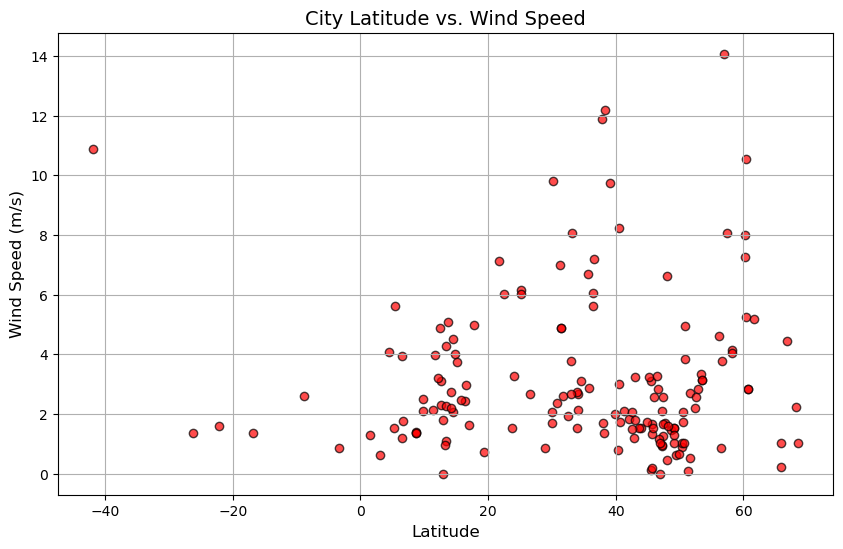

In [11]:
# Build scatter plot for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], c="red", edgecolors="black", alpha=0.7)

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
   
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Create regression line
    regression_line = slope * x_values + intercept

    # Plot scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, c="blue", edgecolors="black", alpha=0.7, label="Data Points")

    # Plot regression line
    plt.plot(x_values, regression_line, color="red", linewidth=2, label=f"y = {slope:.2f}x + {intercept:.2f}")

    # Add labels and title
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend()
    plt.grid(True)

    # Save the figure
    plt.savefig(save_path)

    # Show plot
    plt.show()

    # Print correlation details
    print(f"Linear Regression Results for {title}")
    print(f"Slope: {slope:.2f}")
    print(f"Intercept: {intercept:.2f}")
    print(f"R-squared value: {r_value**2:.2f}")
    print(f"P-value: {p_value:.2e}")
    print("-" * 40)



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Us,49.100945,1.967247,-0.84,100,34,1.03,FR,1741056538
1,Uz,42.966369,-0.085232,4.81,85,97,3.23,FR,1741056539
2,City of Osh,40.536190,72.803362,-5.55,68,16,3.00,KG,1741056540
3,Юськи,56.660308,53.080233,-6.80,96,100,3.77,RU,1741056541
4,Geva,32.566336,35.371549,12.80,56,100,1.94,IL,1741056543


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
11,Companhia,-22.182269,-44.687760,14.68,94,1,1.59,BR,1741056552
43,ng,-3.366947,36.677389,16.32,88,8,0.85,TZ,1741056595
93,Calle,-41.856330,-73.991786,14.72,84,100,10.89,CL,1741056661
94,Ua,-8.861330,121.203800,26.81,72,25,2.59,ID,1741056663
128,Vlakfontein 238-Iq,-26.203108,27.836819,17.52,88,0,1.35,ZA,1741056708


###  Temperature vs. Latitude Linear Regression Plot

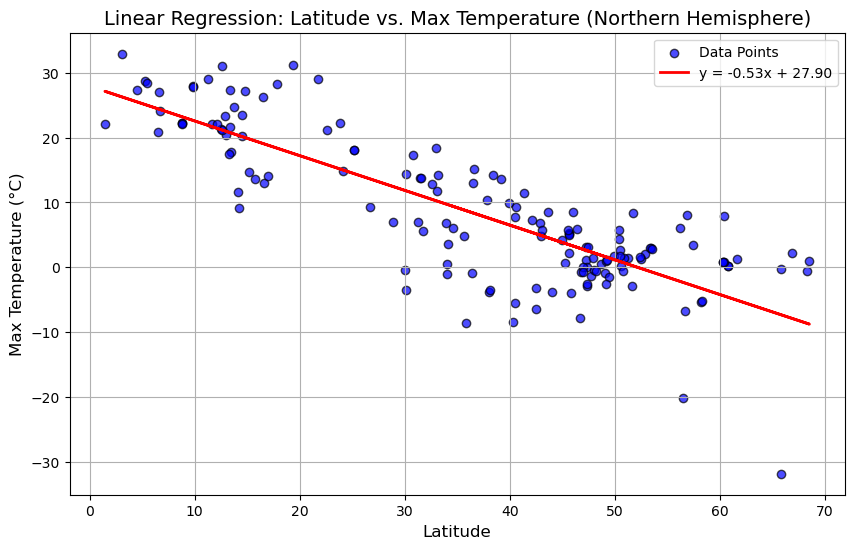

Linear Regression Results for Linear Regression: Latitude vs. Max Temperature (Northern Hemisphere)
Slope: -0.53
Intercept: 27.90
R-squared value: 0.68
P-value: 5.65e-39
----------------------------------------


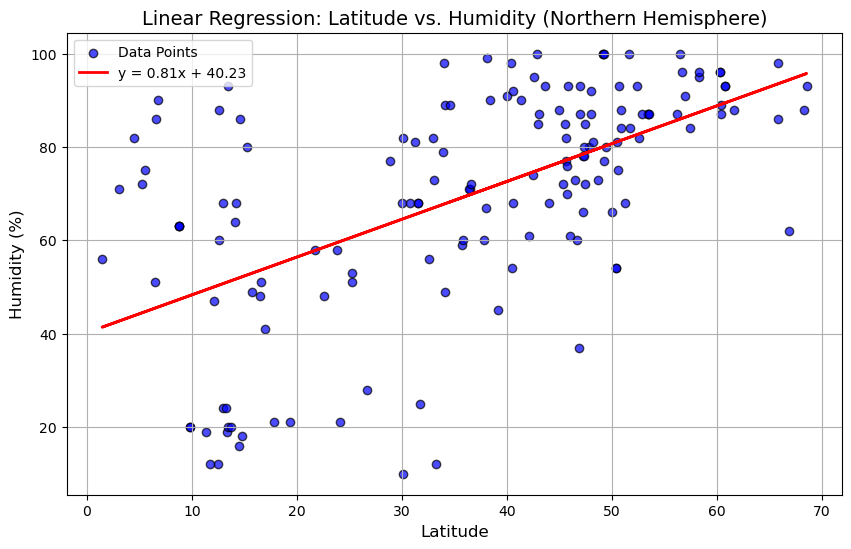

Linear Regression Results for Linear Regression: Latitude vs. Humidity (Northern Hemisphere)
Slope: 0.81
Intercept: 40.23
R-squared value: 0.34
P-value: 3.77e-15
----------------------------------------


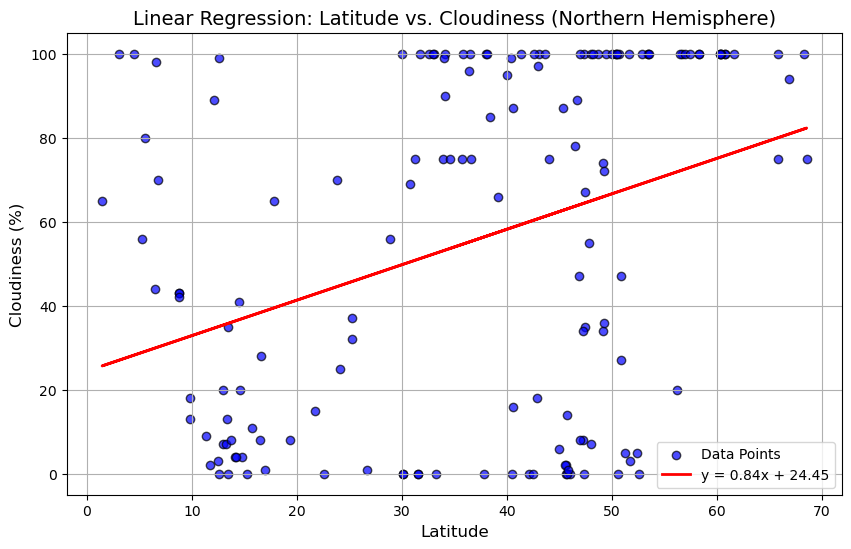

Linear Regression Results for Linear Regression: Latitude vs. Cloudiness (Northern Hemisphere)
Slope: 0.84
Intercept: 24.45
R-squared value: 0.12
P-value: 8.14e-06
----------------------------------------


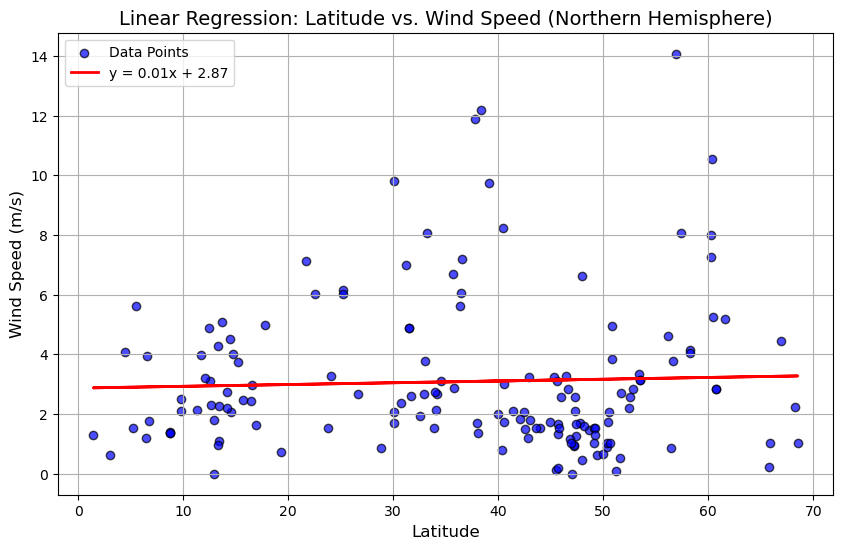

Linear Regression Results for Linear Regression: Latitude vs. Wind Speed (Northern Hemisphere)
Slope: 0.01
Intercept: 2.87
R-squared value: 0.00
P-value: 6.18e-01
----------------------------------------


In [15]:
# Linear regression on Northern Hemisphere

# Perform Linear Regression on Northern Hemisphere Data using the function

# Plot Latitude vs. Temperature Regression
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
    "Latitude", "Max Temperature (°C)",
    "Linear Regression: Latitude vs. Max Temperature (Northern Hemisphere)",
    "output_data/Regression_Temperature_Northern.png"
)

# Plot Latitude vs. Humidity Regression
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
    "Latitude", "Humidity (%)",
    "Linear Regression: Latitude vs. Humidity (Northern Hemisphere)",
    "output_data/Regression_Humidity_Northern.png"
)

# Plot Latitude vs. Cloudiness Regression
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
    "Latitude", "Cloudiness (%)",
    "Linear Regression: Latitude vs. Cloudiness (Northern Hemisphere)",
    "output_data/Regression_Cloudiness_Northern.png"
)

# Plot Latitude vs. Wind Speed Regression
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
    "Latitude", "Wind Speed (m/s)",
    "Linear Regression: Latitude vs. Wind Speed (Northern Hemisphere)",
    "output_data/Regression_WindSpeed_Northern.png"
)


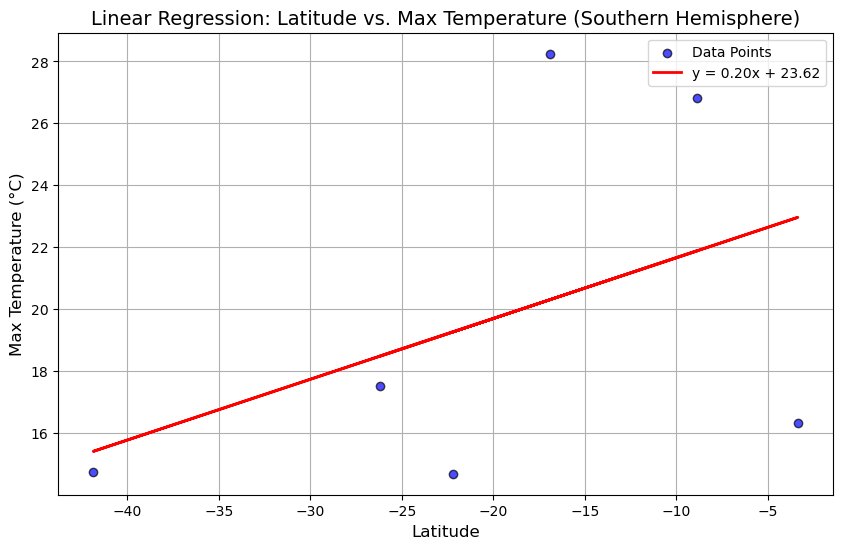

Linear Regression Results for Linear Regression: Latitude vs. Max Temperature (Southern Hemisphere)
Slope: 0.20
Intercept: 23.62
R-squared value: 0.19
P-value: 3.89e-01
----------------------------------------


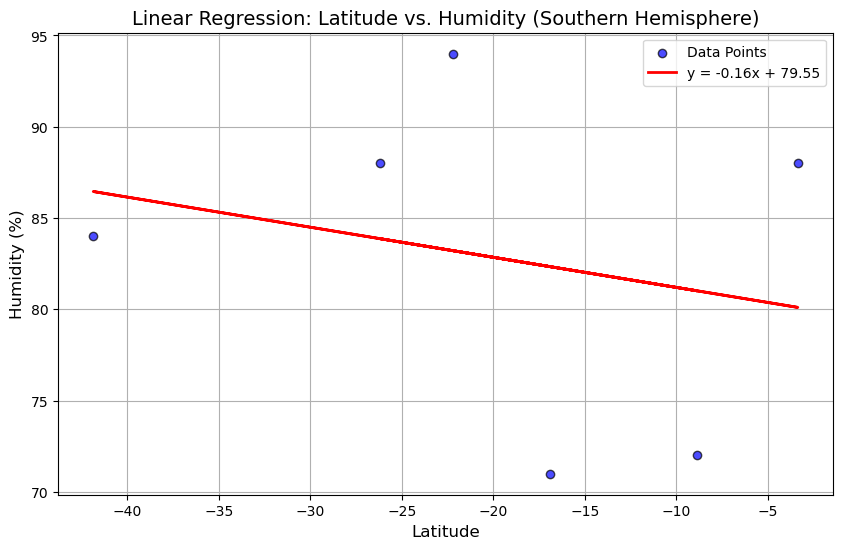

Linear Regression Results for Linear Regression: Latitude vs. Humidity (Southern Hemisphere)
Slope: -0.16
Intercept: 79.55
R-squared value: 0.06
P-value: 6.46e-01
----------------------------------------


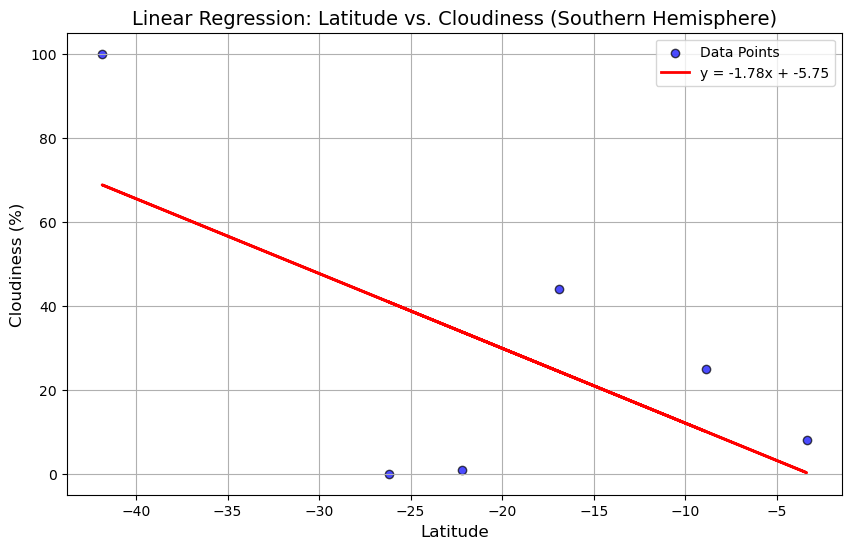

Linear Regression Results for Linear Regression: Latitude vs. Cloudiness (Southern Hemisphere)
Slope: -1.78
Intercept: -5.75
R-squared value: 0.40
P-value: 1.76e-01
----------------------------------------


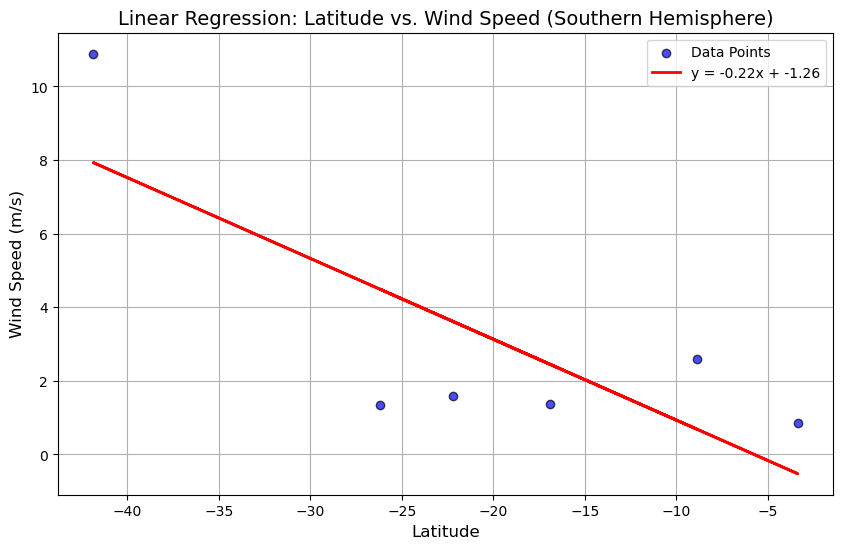

Linear Regression Results for Linear Regression: Latitude vs. Wind Speed (Southern Hemisphere)
Slope: -0.22
Intercept: -1.26
R-squared value: 0.60
P-value: 6.87e-02
----------------------------------------


In [18]:
# Perform Linear Regression on Southern Hemisphere Data using the function

# Plot Latitude vs. Temperature Regression
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
    "Latitude", "Max Temperature (°C)",
    "Linear Regression: Latitude vs. Max Temperature (Southern Hemisphere)",
    "output_data/Regression_Temperature_Southern.png"
)

# Plot Latitude vs. Humidity Regression
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
    "Latitude", "Humidity (%)",
    "Linear Regression: Latitude vs. Humidity (Southern Hemisphere)",
    "output_data/Regression_Humidity_Southern.png"
)

# Plot Latitude vs. Cloudiness Regression
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
    "Latitude", "Cloudiness (%)",
    "Linear Regression: Latitude vs. Cloudiness (Southern Hemisphere)",
    "output_data/Regression_Cloudiness_Southern.png"
)

# Plot Latitude vs. Wind Speed Regression
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
    "Latitude", "Wind Speed (m/s)",
    "Linear Regression: Latitude vs. Wind Speed (Southern Hemisphere)",
    "output_data/Regression_WindSpeed_Southern.png"
)


**Discussion about the linear relationship:** 